### About Dataset
Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('C:/Users/arkad/Desktop/Pliki_do_analizy/credit_score/train.csv', low_memory=False)

In [3]:
raw_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
raw_data.shape

(100000, 28)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
raw_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [8]:
raw_data.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [9]:
raw_data.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
77075,0x1d99d,CUS_0x5f9a,April,Leahc,36_,#F%$D@*&8,Teacher,139702.24,11866.853333,4,...,Good,342.6,34.093549,31 Years and 10 Months,No,0.000000,599.0319176732835,Low_spent_Medium_value_payments,867.6534156600499,Standard
18677,0x836f,CUS_0x1e16,June,Katharina Bartt,53,443-08-6028,Journalist,40019.0,3401.916667,2,...,_,1445.81,27.073178,20 Years and 4 Months,No,70.340340,185.138181316812,!@9#%8,364.7131450118252,Good
15178,0x6ef0,CUS_0x6673,March,Lesley Wroughtonv,31,959-24-9730,Entrepreneur,59050.48_,5018.873333,8,...,_,4283.98,34.867834,2 Years and 1 Months,Yes,339.495329,NaN,!@9#%8,289.20049153810817,Standard
70045,0x1b06b,CUS_0xaa83,June,Byrnesy,35,331-60-0907,Lawyer,61634.54,4957.211667,3,...,Good,793.77,36.205008,29 Years and 6 Months,No,68.856718,210.24538652339768,Low_spent_Medium_value_payments,496.61906208787735,Standard
85024,0x20832,CUS_0x9b0e,January,Krishnank,47,850-93-7960,Doctor,92699.31,7927.942500,3,...,Good,46.93,35.503163,17 Years and 8 Months,No,217.758064,404.83490344450524,High_spent_Small_value_payments,430.2012827028106,Good
81646,0x1f464,CUS_0x716,July,NaN,44,356-20-4069,Lawyer,18897.13,1345.760833,9,...,Bad,3351.81,39.262978,10 Years and 5 Months,Yes,87.476345,85.12530236734823,Low_spent_Small_value_payments,251.9744354872685,Standard
98873,0x25957,CUS_0x3e03,February,Martinne Gellerj,23_,504-67-6939,Developer,35971.49,NaN,5,...,Standard,132.82,33.062657,27 Years and 4 Months,Yes,54.481740,109.92386293068009,Low_spent_Large_value_payments,415.35681355813887,Standard
73955,0x1c755,CUS_0xb7e2,April,Wohld,34,778-42-7488,Media_Manager,21509.645,1639.470417,4,...,Good,73.61,32.107224,29 Years and 6 Months,No,9.168931,131.54005666688886,Low_spent_Small_value_payments,313.2380537379421,Good
94631,0x24079,CUS_0xa362,August,Rickt,15,#F%$D@*&8,Lawyer,123947.36,10356.946667,8,...,_,145.03,34.639171,18 Years and 9 Months,Yes,611.286694,236.53352626558697,High_spent_Large_value_payments,427.8744466657336,Standard
17363,0x7bbd,CUS_0x6fd5,April,Kevin Krolickic,41_,741-35-9886,Musician,14096.44,977.959594,9,...,Bad,1398.28,27.871499,17 Years and 2 Months,Yes,166.651431,48.87296632942881,Low_spent_Small_value_payments,273.18967563303426,Poor


After first data exploration, we can notice to have many incorrect values. Next step is cleaning process.

### Data cleaning

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
raw_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


 Each column is displayed to have wider sight to data and decide which column should be deleted from our model.

In [12]:
raw_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
new_data = raw_data.copy()

In [14]:
new_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [15]:
deleted_cols = ['ID','Customer_ID','Month','Name','SSN','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries',
         'Credit_Utilization_Ratio']
new_data = new_data.drop(deleted_cols,axis=1)

In [16]:
new_data.shape

(100000, 15)

In [17]:
len(deleted_cols)

13

In [18]:
for i in new_data:
    print('\n',i,new_data[i].unique())


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]

 Delay_from_due_date [ 3 -1  5  6  8  7 13 10  0  4  9  1 12 11 30 31 34 27 14  2 -2 16 17 15
 23 22 21 18 19 52 51 48 53 26 43 28 25 20 47 46 49 24 61 29 50 58 45 59
 55 56 57 54 62 65 64 67 36 41 33 32 39 44 42 60 35 38 -3 63 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' nan '4' '8_' '6' '1' '-1' '3_' '0' '8' '5' '3' '9' '12' '15' '17'
 '10' '2' '2_' '11' '14' '20' '22' '13' '13_' '14_' '16' '12_' '18' '19'
 '23' '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '21_'
 '25' '10_' '183_' '9_' '1106' '834' '19_' '24_' '17_' '

In [19]:
symbols = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income','Amount_invested_monthly']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in col_int:
  for j in symbols:
    new_data[i] = new_data[i].astype(str).str.replace(j,'')
for i in col_str:
  for j in symbols:
    new_data[i] = new_data[i].replace(j,'')
new_data.head()

C:\Users\arkad\AppData\Local\Temp\ipykernel_15080\3786464233.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_data[i] = new_data[i].astype(str).str.replace(j,'')


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,7,_,809.98,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,-1,nan,Good,809.98,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,7,Good,809.98,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,5,4,Good,809.98,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,6,nan,Good,809.98,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [20]:
for i in new_data:
    print('\n',i,new_data[i].unique())


 Age ['23' '-500' '28' ... '4808' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '143162.64' ... '37188.1' '20002.88' '39628.99']

 Monthly_Inhand_Salary [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]

 Delay_from_due_date ['3' '-1' '5' '6' '8' '7' '13' '10' '0' '4' '9' '1' '12' '11' '30' '31'
 '34' '27' '14' '2' '-2' '16' '17' '15' '23' '22' '21' '18' '19' '52' '51'
 '48' '53' '26' '43' '28' '25' '20' '47' '46' '49' '24' '61' '29' '50'
 '58' '45' '59' '55' '56' '57' '54' '62' '65' '64' '67' '36' '41' '33'
 '32' '39' '44' '42' '60' '35' '38' '-3' '63' '40' '37' '-5' '-4' '66']

 Num_of_Delayed_Payment ['7' 'nan' '4' '8' '6' '1' '-1' '3' '0' '5' '9' '12' '15' '17' '10' '2'
 '11' '14' '20' '22' '13' '16' '18' '19' '23' '24' '21' '3318' '308

In [21]:
new_data['Occupation'] = new_data['Occupation'].replace('_______', np.nan)

In [22]:
new_data['Payment_Behaviour'] = new_data['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [23]:
new_data['Payment_of_Min_Amount'] = new_data['Payment_of_Min_Amount'].replace('NM',np.nan)

In [24]:
new_data['Credit_Mix'] = new_data['Credit_Mix'].replace('_', np.nan)


In [25]:
new_data.isnull().sum()

Age                            0
Occupation                  7062
Annual_Income                  0
Monthly_Inhand_Salary      15002
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Credit_Mix                 20195
Outstanding_Debt               0
Credit_History_Age          9030
Payment_of_Min_Amount      12007
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour           7600
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [26]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  object 
 1   Occupation               92938 non-null   object 
 2   Annual_Income            100000 non-null  object 
 3   Monthly_Inhand_Salary    84998 non-null   float64
 4   Delay_from_due_date      100000 non-null  object 
 5   Num_of_Delayed_Payment   100000 non-null  object 
 6   Credit_Mix               79805 non-null   object 
 7   Outstanding_Debt         100000 non-null  object 
 8   Credit_History_Age       90970 non-null   object 
 9   Payment_of_Min_Amount    87993 non-null   object 
 10  Total_EMI_per_month      100000 non-null  object 
 11  Amount_invested_monthly  100000 non-null  object 
 12  Payment_Behaviour        92400 non-null   object 
 13  Monthly_Balance          100000 non-null  object 
 14  Credi

#### After removing inccorect names in three columns Occupation, Payment_of_Min_Amount and Payment_Behaviour, empty rows significantly increased

### Next step is filling empty rows

####  String values will be randomly set and numeric values by median

In [27]:
new_data['Occupation'].unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [28]:
new_data['Occupation'] = new_data['Occupation'].fillna(np.random.choice(pd.Series(['Scientist','Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [29]:
new_data['Occupation'].isnull().sum()

0

In [30]:
new_data['Credit_Mix'].unique()


array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [31]:
new_data['Credit_Mix'] = new_data['Credit_Mix'].fillna(np.random.choice(pd.Series(['Good', 'Standard', 'Bad'])))


In [32]:
new_data['Credit_Mix'].isnull().sum()

0

In [33]:
new_data['Payment_of_Min_Amount'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [34]:
new_data['Payment_of_Min_Amount'] = new_data['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes','No'])))

In [35]:
new_data['Payment_of_Min_Amount'].isnull().sum()

0

In [36]:
new_data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [37]:
new_data['Payment_Behaviour'] = new_data['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'])))

In [38]:
new_data['Payment_Behaviour'].isnull().sum()

0

Credit_History_Age will be converted to numeric values without string

In [39]:
new_data['Credit_History_Age'] = new_data['Credit_History_Age'].astype(str).str.replace('Years and','.')
new_data['Credit_History_Age'] = new_data['Credit_History_Age'].astype(str).str.replace('Months','')

In [40]:
new_data['Credit_History_Age']

0         22 . 1 
1             nan
2         22 . 3 
3         22 . 4 
4         22 . 5 
           ...   
99995     31 . 6 
99996     31 . 7 
99997     31 . 8 
99998     31 . 9 
99999    31 . 10 
Name: Credit_History_Age, Length: 100000, dtype: object

Remove space between number and dot

In [41]:
new_data['Credit_History_Age'] = new_data['Credit_History_Age'].astype(str).str.replace(' ','')

In [42]:
new_data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,7,Good,809.98,22.1,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,-1,nan,Good,809.98,nan,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,7,Good,809.98,22.3,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,5,4,Good,809.98,22.4,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,6,nan,Good,809.98,22.5,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Now numerical data will be filled by median

In [43]:
for i in ['Monthly_Inhand_Salary','Credit_History_Age']:
    new_data[i].fillna(new_data[i].median(), inplace=True)

Checking if each NaN was removed from data

In [44]:
new_data.isna().sum()

Age                        0
Occupation                 0
Annual_Income              0
Monthly_Inhand_Salary      0
Delay_from_due_date        0
Num_of_Delayed_Payment     0
Credit_Mix                 0
Outstanding_Debt           0
Credit_History_Age         0
Payment_of_Min_Amount      0
Total_EMI_per_month        0
Amount_invested_monthly    0
Payment_Behaviour          0
Monthly_Balance            0
Credit_Score               0
dtype: int64

### Data transform

In [45]:
new_data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [46]:
new_data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [47]:
new_data['Credit_Score'] = new_data['Credit_Score'].replace({'Good':2, 'Standard':1, 'Poor':0})

In [48]:
new_data['Credit_Score'].value_counts()

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64

In [49]:
new_data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [50]:
new_data['Credit_Mix'].value_counts()


Good        44532
Standard    36479
Bad         18989
Name: Credit_Mix, dtype: int64

In [51]:
new_data['Credit_Mix'] = new_data['Credit_Mix'].replace({'Good':2, 'Standard':1, 'Bad':0})

In [52]:
new_data['Credit_Mix'].value_counts()

2    44532
1    36479
0    18989
Name: Credit_Mix, dtype: int64

In [53]:
new_data['Payment_of_Min_Amount'] = new_data['Payment_of_Min_Amount'].replace({'Yes':1, 'No':0})

In [54]:
new_data['Payment_of_Min_Amount'].value_counts()

1    64333
0    35667
Name: Payment_of_Min_Amount, dtype: int64

Payment behaviour and Occupation will be transformed by popular technique - One-Hot Encoding.

In [55]:
new_data = pd.get_dummies(data=new_data,columns=['Occupation', 'Payment_Behaviour'],drop_first=False )

In [56]:
new_data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,1824.843333,3,7,2,809.98,22.1,0,49.57494921489417,80.41529543900253,312.49408867943663,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,23,19114.12,3093.745000,-1,nan,2,809.98,nan,0,49.57494921489417,118.28022162236736,284.62916249607184,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,-500,19114.12,3093.745000,3,7,2,809.98,22.3,0,49.57494921489417,81.699521264648,331.2098628537912,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,23,19114.12,3093.745000,5,4,2,809.98,22.4,0,49.57494921489417,199.4580743910713,223.45130972736786,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,23,19114.12,1824.843333,6,nan,2,809.98,22.5,0,49.57494921489417,41.420153086217326,341.48923103222177,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


Column name change after using One-Hot Encoding to short their names. Cut 'Occupation_' prefix from names.

In [57]:
for i in new_data.columns:
    new_data.rename(columns={i:i.replace('Occupation_','')},inplace=True)

In [58]:
new_data

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,1824.843333,3,7,2,809.98,22.1,0,49.57494921489417,80.41529543900253,312.49408867943663,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,23,19114.12,3093.745000,-1,nan,2,809.98,nan,0,49.57494921489417,118.28022162236736,284.62916249607184,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,-500,19114.12,3093.745000,3,7,2,809.98,22.3,0,49.57494921489417,81.699521264648,331.2098628537912,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,23,19114.12,3093.745000,5,4,2,809.98,22.4,0,49.57494921489417,199.4580743910713,223.45130972736786,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,23,19114.12,1824.843333,6,nan,2,809.98,22.5,0,49.57494921489417,41.420153086217326,341.48923103222177,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,23,7,2,502.38,31.6,0,35.10402261040746,60.97133255718485,479.86622816574095,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
99996,25,39628.99,3359.415833,18,7,2,502.38,31.7,0,35.10402261040746,54.18595028760385,496.651610435322,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
99997,25,39628.99,3359.415833,27,6,2,502.38,31.8,0,35.10402261040746,24.02847744864441,516.8090832742814,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
99998,25,39628.99,3359.415833,20,nan,2,502.38,31.9,0,35.10402261040746,251.67258219721603,319.1649785257098,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Now we can see 'nan' values in some of columns that were not detected before due to 'nan' is not recognized as 'NaN'.

In [59]:
new_data.query("Num_of_Delayed_Payment =='nan'")

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
1,23,19114.12,3093.745000,-1,nan,2,809.98,nan,0,49.57494921489417,118.28022162236736,284.62916249607184,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,23,19114.12,1824.843333,6,nan,2,809.98,22.5,0,49.57494921489417,41.420153086217326,341.48923103222177,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
30,55,30689.89,2612.490833,5,nan,2,632.46,17.9,0,16.415451659824875,71.28367488286933,443.5499567906391,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32,21,35547.71,2853.309167,5,nan,1,943.86,30.8,1,0.0,276.72539431736266,288.60552234930395,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
33,21,35547.71,3093.745000,9,nan,1,943.86,30.9,1,0.0,74.44364104999623,460.88727561667037,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,45,16680.35,1528.029167,1,nan,2,897.16,21.6,0,41.11356058992596,10000,233.3015390325111,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
99974,45,16680.35,1528.029167,1,nan,2,897.16,21.7,0,41.11356058992596,nan,340.68483402219437,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
99992,24,39628.99,3359.415833,23,nan,2,502.38,31.3,0,35.10402261040746,401.1964806036356,189.64108011929028,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
99993,25,39628.99,3359.415833,23,nan,2,502.38,31.4,0,58638.0,180.7330951944497,400.1044655284761,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


Now there're 7002 'nan' values detected

In [60]:
new_data['Num_of_Delayed_Payment'].replace('nan',np.nan,inplace=True)

In [61]:
new_data

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,1824.843333,3,7,2,809.98,22.1,0,49.57494921489417,80.41529543900253,312.49408867943663,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,23,19114.12,3093.745000,-1,NaN,2,809.98,nan,0,49.57494921489417,118.28022162236736,284.62916249607184,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,-500,19114.12,3093.745000,3,7,2,809.98,22.3,0,49.57494921489417,81.699521264648,331.2098628537912,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,23,19114.12,3093.745000,5,4,2,809.98,22.4,0,49.57494921489417,199.4580743910713,223.45130972736786,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,23,19114.12,1824.843333,6,NaN,2,809.98,22.5,0,49.57494921489417,41.420153086217326,341.48923103222177,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,23,7,2,502.38,31.6,0,35.10402261040746,60.97133255718485,479.86622816574095,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
99996,25,39628.99,3359.415833,18,7,2,502.38,31.7,0,35.10402261040746,54.18595028760385,496.651610435322,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
99997,25,39628.99,3359.415833,27,6,2,502.38,31.8,0,35.10402261040746,24.02847744864441,516.8090832742814,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
99998,25,39628.99,3359.415833,20,NaN,2,502.38,31.9,0,35.10402261040746,251.67258219721603,319.1649785257098,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [62]:
new_data[new_data['Credit_History_Age']=='nan']

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
1,23,19114.12,3093.745000,-1,NaN,2,809.98,nan,0,49.57494921489417,118.28022162236736,284.62916249607184,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,23,19114.12,1824.843333,3,6,2,809.98,nan,0,49.57494921489417,24.785216509052056,358.12416760938714,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
19,34,143162.64,12187.220000,8,5,2,1303.01,nan,0,246.9923194537421,825.2162699393922,426.5134106068658,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
40,31,73928.46,3093.745000,12,10,2,548.2,nan,0,15015.0,98.67440994166124,740.1960900583389,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
42,31,73928.46,5988.705000,8,7,2,548.2,nan,0,0.0,150.05973429800815,698.8107657019921,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,33,59146.36,3093.745000,8,6,2,418.03,nan,0,26.77841927204154,606.4365424304076,147.67137163088418,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
99963,-500,42903.79,3093.745000,14,0,2,1079.48,nan,0,34.975456694041306,31.19391926667726,520.6622073726148,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99968,44,16680.35,1528.029167,4,0,2,897.16,nan,1,41.11356058992596,52.95197781627658,318.73737826046414,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
99975,45,16680.35,3093.745000,1,0,2,897.16,nan,0,41.11356058992596,70.8055497847255,310.8838062920152,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In above query we have 9030 rows with 'nan'

In [63]:
new_data['Credit_History_Age'].replace('nan',np.nan,inplace=True)

In [64]:
new_data.isnull().sum()

Age                                                      0
Annual_Income                                            0
Monthly_Inhand_Salary                                    0
Delay_from_due_date                                      0
Num_of_Delayed_Payment                                7002
Credit_Mix                                               0
Outstanding_Debt                                         0
Credit_History_Age                                    9030
Payment_of_Min_Amount                                    0
Total_EMI_per_month                                      0
Amount_invested_monthly                                  0
Monthly_Balance                                          0
Credit_Score                                             0
Accountant                                               0
Architect                                                0
Developer                                                0
Doctor                                                  

In [65]:
for i in ['Num_of_Delayed_Payment','Credit_History_Age']:
    new_data[i].fillna(new_data[i].median(), inplace=True)

In [66]:
new_data.isnull().sum()

Age                                                   0
Annual_Income                                         0
Monthly_Inhand_Salary                                 0
Delay_from_due_date                                   0
Num_of_Delayed_Payment                                0
Credit_Mix                                            0
Outstanding_Debt                                      0
Credit_History_Age                                    0
Payment_of_Min_Amount                                 0
Total_EMI_per_month                                   0
Amount_invested_monthly                               0
Monthly_Balance                                       0
Credit_Score                                          0
Accountant                                            0
Architect                                             0
Developer                                             0
Doctor                                                0
Engineer                                        

In [67]:
new_data

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,1824.843333,3,7,2,809.98,22.1,0,49.57494921489417,80.41529543900253,312.49408867943663,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,23,19114.12,3093.745000,-1,14.0,2,809.98,18.2,0,49.57494921489417,118.28022162236736,284.62916249607184,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,-500,19114.12,3093.745000,3,7,2,809.98,22.3,0,49.57494921489417,81.699521264648,331.2098628537912,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,23,19114.12,3093.745000,5,4,2,809.98,22.4,0,49.57494921489417,199.4580743910713,223.45130972736786,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,23,19114.12,1824.843333,6,14.0,2,809.98,22.5,0,49.57494921489417,41.420153086217326,341.48923103222177,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,23,7,2,502.38,31.6,0,35.10402261040746,60.97133255718485,479.86622816574095,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
99996,25,39628.99,3359.415833,18,7,2,502.38,31.7,0,35.10402261040746,54.18595028760385,496.651610435322,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
99997,25,39628.99,3359.415833,27,6,2,502.38,31.8,0,35.10402261040746,24.02847744864441,516.8090832742814,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
99998,25,39628.99,3359.415833,20,14.0,2,502.38,31.9,0,35.10402261040746,251.67258219721603,319.1649785257098,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Outliers and duplicates checking

In [68]:
clean_data = new_data.copy()

In [69]:
clean_data.count()

Age                                                   100000
Annual_Income                                         100000
Monthly_Inhand_Salary                                 100000
Delay_from_due_date                                   100000
Num_of_Delayed_Payment                                100000
Credit_Mix                                            100000
Outstanding_Debt                                      100000
Credit_History_Age                                    100000
Payment_of_Min_Amount                                 100000
Total_EMI_per_month                                   100000
Amount_invested_monthly                               100000
Monthly_Balance                                       100000
Credit_Score                                          100000
Accountant                                            100000
Architect                                             100000
Developer                                             100000
Doctor                  

In [70]:
clean_data = clean_data.drop_duplicates()

In [71]:
clean_data.count()

Age                                                   100000
Annual_Income                                         100000
Monthly_Inhand_Salary                                 100000
Delay_from_due_date                                   100000
Num_of_Delayed_Payment                                100000
Credit_Mix                                            100000
Outstanding_Debt                                      100000
Credit_History_Age                                    100000
Payment_of_Min_Amount                                 100000
Total_EMI_per_month                                   100000
Amount_invested_monthly                               100000
Monthly_Balance                                       100000
Credit_Score                                          100000
Accountant                                            100000
Architect                                             100000
Developer                                             100000
Doctor                  

In [72]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  object 
 1   Annual_Income                                       100000 non-null  object 
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Delay_from_due_date                                 100000 non-null  object 
 4   Num_of_Delayed_Payment                              100000 non-null  object 
 5   Credit_Mix                                          100000 non-null  int64  
 6   Outstanding_Debt                                    100000 non-null  object 
 7   Credit_History_Age                                  100000 non-null  object 
 8   Payment_of_Min_Amount                               100000 non-nu

In [73]:
for i in clean_data:
    if clean_data[i].dtype =='object':
        clean_data[i] = clean_data[i].astype(float)

In [74]:
for i in ['Amount_invested_monthly', 'Monthly_Balance']:
    clean_data[i].fillna(clean_data[i].median(), inplace=True)

In [75]:
clean_data.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object')

In [76]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Delay_from_due_date                                 100000 non-null  float64
 4   Num_of_Delayed_Payment                              100000 non-null  float64
 5   Credit_Mix                                          100000 non-null  int64  
 6   Outstanding_Debt                                    100000 non-null  float64
 7   Credit_History_Age                                  100000 non-null  float64
 8   Payment_of_Min_Amount                               100000 non-nu

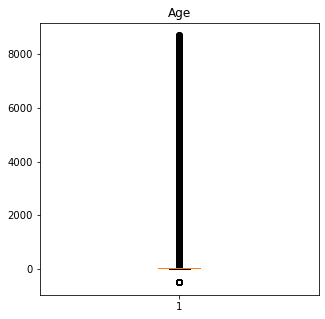

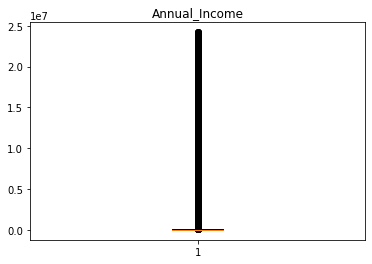

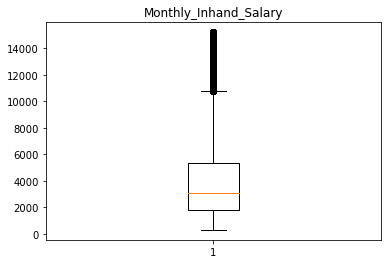

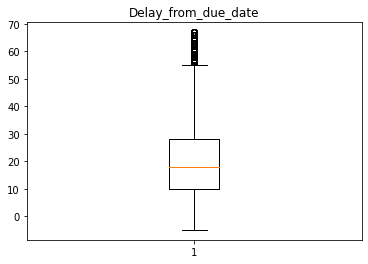

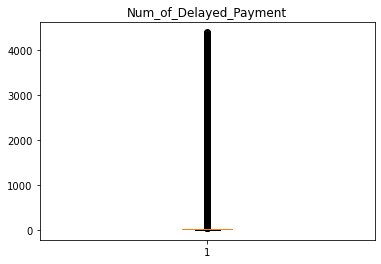

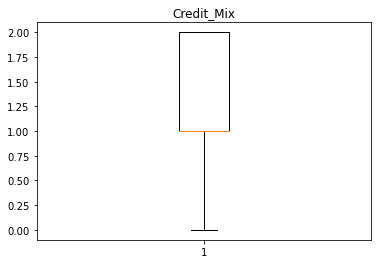

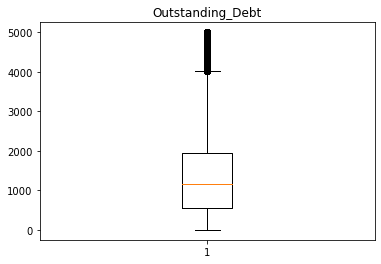

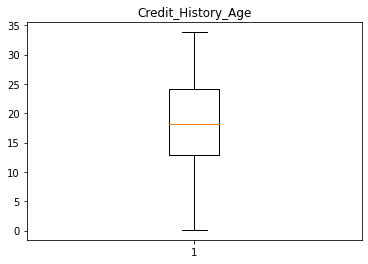

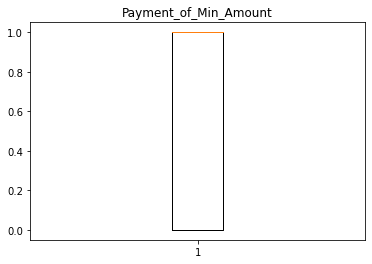

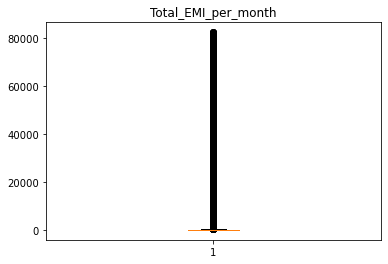

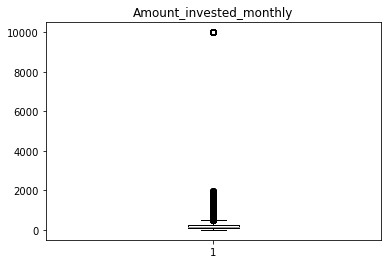

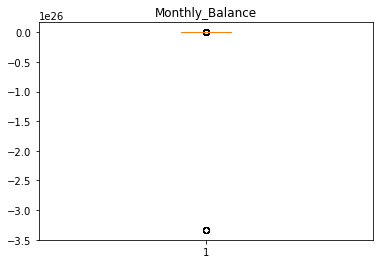

In [77]:
cols_outliers = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']
plt.figure(figsize=(5,5))
for i in cols_outliers:
    plt.boxplot(clean_data[i])
    plt.title(i)
    plt.show()

In [78]:
cols_outliers_remove = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt',
        'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']


In [79]:
# Drop outlier by IQR calculation
for i in cols_outliers_remove:
    Q1 = clean_data[i].quantile(0.25)
    Q3 = clean_data[i].quantile(0.75)
    IQR = Q3 - Q1
    clean_data = clean_data.drop(clean_data.loc[clean_data[i] > (Q3 + 1.5 * IQR)].index)
    clean_data = clean_data.drop(clean_data.loc[clean_data[i] < (Q1 - 1.5 * IQR)].index)
    clean_data

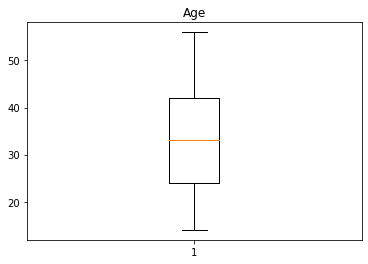

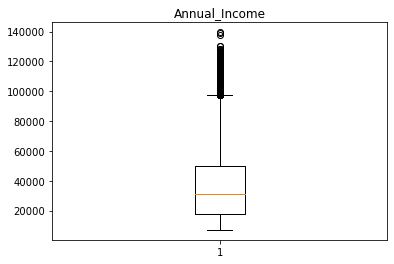

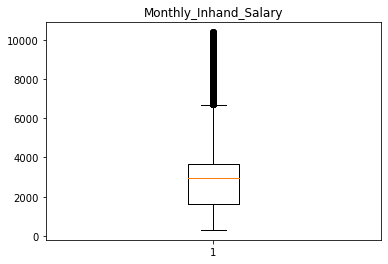

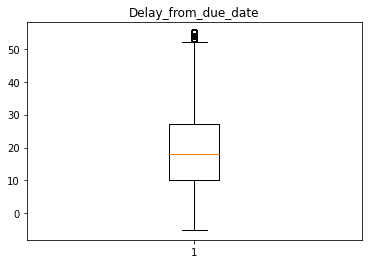

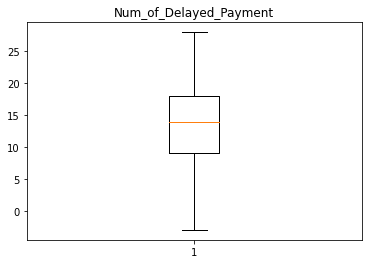

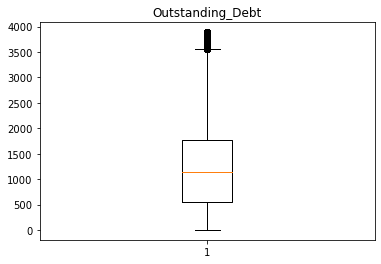

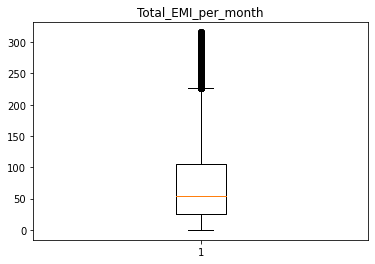

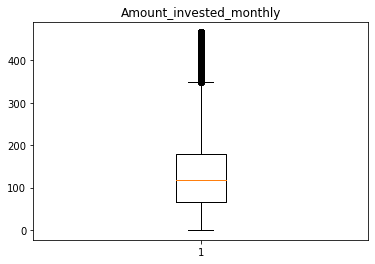

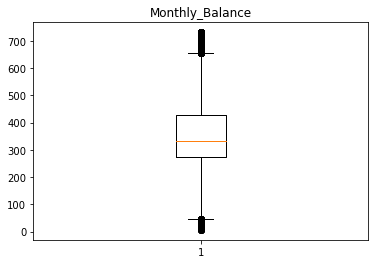

In [80]:
for i in cols_outliers_remove:
    plt.boxplot(clean_data[i])
    plt.title(i)
    plt.show()

### Data check

Checking data after outliers removing

In [81]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63276 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 63276 non-null  float64
 1   Annual_Income                                       63276 non-null  float64
 2   Monthly_Inhand_Salary                               63276 non-null  float64
 3   Delay_from_due_date                                 63276 non-null  float64
 4   Num_of_Delayed_Payment                              63276 non-null  float64
 5   Credit_Mix                                          63276 non-null  int64  
 6   Outstanding_Debt                                    63276 non-null  float64
 7   Credit_History_Age                                  63276 non-null  float64
 8   Payment_of_Min_Amount                               63276 non-null  int64  


 Correlation with Credit Score

In [82]:
clean_data.corrwith(clean_data['Credit_Score'])*100

Age                                                    15.841345
Annual_Income                                          11.768849
Monthly_Inhand_Salary                                  10.667683
Delay_from_due_date                                   -42.202625
Num_of_Delayed_Payment                                -33.993173
Credit_Mix                                             38.565087
Outstanding_Debt                                      -42.286632
Credit_History_Age                                     37.036883
Payment_of_Min_Amount                                 -39.954807
Total_EMI_per_month                                   -11.913348
Amount_invested_monthly                                 5.971121
Monthly_Balance                                        18.490445
Credit_Score                                          100.000000
Accountant                                              0.321098
Architect                                              -0.112202
Developer                

<AxesSubplot:>

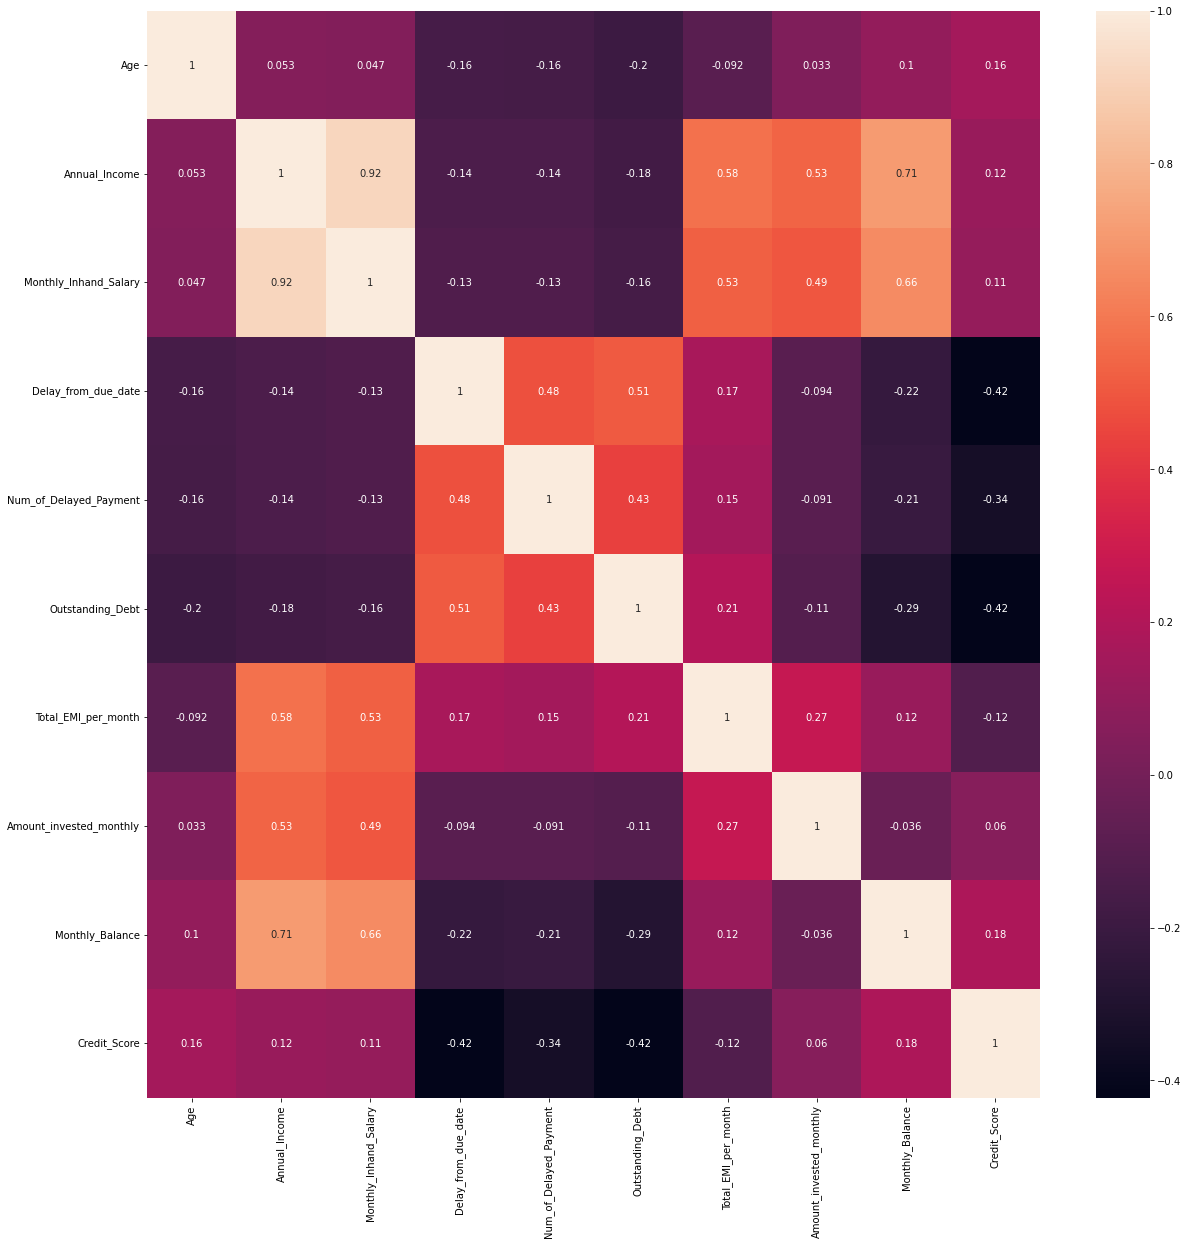

In [83]:
corr_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt',
        'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance','Credit_Score']
plt.figure(figsize= (20,20))
sns.heatmap(clean_data[corr_cols].corr(),annot=True)

## Modeling

In [84]:
x_data = clean_data
y_target = clean_data.pop('Credit_Score')

In [85]:
x_data

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,7.0,2,809.98,22.1,0,49.574949,80.415295,312.494089,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,23.0,19114.12,3093.745000,-1.0,14.0,2,809.98,18.2,0,49.574949,118.280222,284.629162,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,23.0,19114.12,3093.745000,5.0,4.0,2,809.98,22.4,0,49.574949,199.458074,223.451310,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,23.0,19114.12,1824.843333,6.0,14.0,2,809.98,22.5,0,49.574949,41.420153,341.489231,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,23.0,19114.12,3093.745000,8.0,4.0,2,809.98,22.6,0,49.574949,62.430172,340.479212,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,23.0,7.0,2,502.38,31.6,0,35.104023,60.971333,479.866228,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
99996,25.0,39628.99,3359.415833,18.0,7.0,2,502.38,31.7,0,35.104023,54.185950,496.651610,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
99997,25.0,39628.99,3359.415833,27.0,6.0,2,502.38,31.8,0,35.104023,24.028477,516.809083,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
99998,25.0,39628.99,3359.415833,20.0,14.0,2,502.38,31.9,0,35.104023,251.672582,319.164979,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [86]:
y_target

0        2
1        2
3        2
4        2
5        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 63276, dtype: int64

In [87]:
x_data.shape

(63276, 33)

In [88]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3)

### Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [112]:
tree_clf = DecisionTreeClassifier()
grid_tree = {'max_depth':[1,2,3,4,5,6,7,8,9],
             'criterion':['gini','entropy'],
             'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}
grid_search_tree = GridSearchCV(tree_clf,grid_tree,scoring='accuracy',cv=5)
grid_search_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [113]:
grid_search_tree.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4}

In [122]:
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=4).fit(X_train,y_train)

In [123]:
y_pred = tree_model.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [127]:
accuracy_score(y_test, y_pred)*100

67.65527050518885

In [128]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3868, 1136,  511],
       [1814, 6690, 1790],
       [ 128,  761, 2285]], dtype=int64)

<Figure size 1440x720 with 0 Axes>

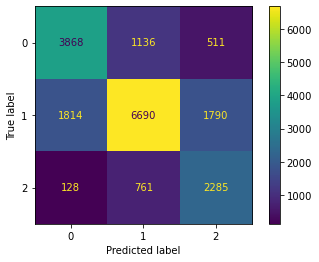

In [129]:
plt.figure(figsize=(20,10))
conf_matr_tree = ConfusionMatrixDisplay(cm)
conf_matr_tree.plot()

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      5515
           1       0.78      0.65      0.71     10294
           2       0.50      0.72      0.59      3174

    accuracy                           0.68     18983
   macro avg       0.65      0.69      0.66     18983
weighted avg       0.70      0.68      0.68     18983

